# Descriptive Analytics

## DataSet-1: Historic health dataset

It contains historic health care data for heart risk.Here’s a brief description of the fields. 

| Variables        | Description                |
|-----------------|----------------------------|
| P_ID            | Patient Unique ID          |
| male            | Gender                     |
| age             | age                        |
| education       | Education code             |
| currentSmoker   | Smoker or Not              |
| cigsPerDay      | Cigrate per Day            |
| BPMeds          | Having BP Medicines        |
| prevalentStroke | Stroke history             |
| prevalentHyp    | Hypertension history       |
| diabetes        | Diabetes                   |
| totChol         | Total cholesterol          |
| sysBP           | Sys BP                     |
| diaBP           | Dia BP                     |
| BMI             | BMI                        |
| heartRate       | Heart rate reading         |
| glucose         | Glucose reading            |
| HeartRisk       | Heart Risk Target Variable |


Task: Analyze this data and come up with insights from the data. You can choose any tool/programming language. You are free to choose the measures that you want to focus on. 
Output: You can present the result of your analysis in a word doc/ppt/pdf/excel or html page.  Also attach the code/steps that were used. 

  


# Predictive Analytics

## DataSet-1: Historic health dataset –Use it for model Building
## Dataset-2: Historic health dataset – Test dataset

Task: Build a model using DataSet-1 and use this model to predict heart risk for Dataset-2 (test dataset). Select the best model to predict heart risk.
Output: Model script and a csv or excel file with only 2 columns (details are mentioned below)
•	PID – Patient ID from test dataset
•	HeartRisk – Predicted value

Tools: R or python will be preferred.

In [1]:
## loading data using pandas
import pandas as pd
import numpy as np
from pandas import ExcelFile
xls = ExcelFile('Dataset-1 (1).xlsx')
df = xls.parse(xls.sheet_names[0])
len(df)

3698

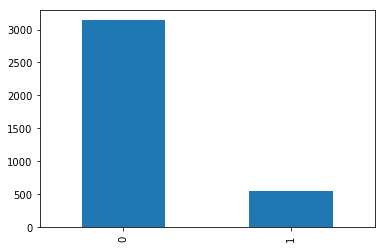

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
df['HeartRisk'].value_counts().plot(kind='bar')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 17 columns):
P_ID               3698 non-null int64
male               3698 non-null int64
age                3698 non-null int64
education          3604 non-null float64
currentSmoker      3698 non-null int64
cigsPerDay         3673 non-null float64
BPMeds             3652 non-null float64
prevalentStroke    3698 non-null int64
prevalentHyp       3698 non-null int64
diabetes           3698 non-null int64
totChol            3652 non-null float64
sysBP              3698 non-null float64
diaBP              3698 non-null float64
BMI                3679 non-null float64
heartRate          3697 non-null float64
glucose            3353 non-null float64
HeartRisk          3698 non-null int64
dtypes: float64(9), int64(8)
memory usage: 491.2 KB


There are few NA values in the datasets. We can either neglect them or fill them with various methods let's first figure out how many rows have NA values 

In [4]:
df_non_na = df.dropna()
len(df_non_na)

3180

518 rows are affected by na so it is a good idea to use some method to fill them but before that wee also need to differntiate categorical and  numeric columns. By looking at the decription we can figure out the categorical variables. Converting those variables into categoricals

In [2]:
category = ['P_ID','male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','HeartRisk']
for col in category:
    df[col] = df[col].astype('category')

Lets figure out which columns are NA. If they are numeric variables we can choose either of stastical methods to fill those but if both numerical and categorical are present we have limited choices. I would rather go with very simple imputations if both types of variables are to be imputed

In [6]:
columns_with_null = df.columns[df.isnull().any()].tolist()
columns_with_null

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

since both numerical and categorical variables are NA I would choose median one of the simple imputation

In [3]:
df_non_na =  df.fillna(df.median(),inplace=True)

In [8]:
df_non_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 17 columns):
P_ID               3698 non-null category
male               3698 non-null category
age                3698 non-null int64
education          3698 non-null category
currentSmoker      3698 non-null category
cigsPerDay         3698 non-null float64
BPMeds             3698 non-null category
prevalentStroke    3698 non-null category
prevalentHyp       3698 non-null category
diabetes           3698 non-null category
totChol            3698 non-null float64
sysBP              3698 non-null float64
diaBP              3698 non-null float64
BMI                3698 non-null float64
heartRate          3698 non-null float64
glucose            3698 non-null float64
HeartRisk          3698 non-null category
dtypes: category(9), float64(7), int64(1)
memory usage: 457.1 KB


In [9]:
df_non_na.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000
mean,49.576257,8.922120,236.805300,132.279746,82.868442,25.805535,75.767442,81.260681
std,8.550586,11.811906,44.450517,21.961688,11.830545,4.062276,11.972536,20.919547
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.082500,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,143.500000,90.000000,28.090000,82.750000,85.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


/home/paperspace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


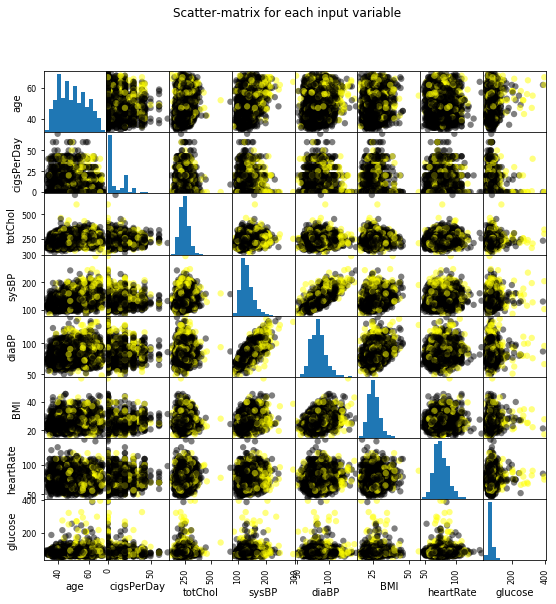

In [10]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','HeartRisk']
X = df_non_na[feature_names]
y = df_non_na['HeartRisk']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

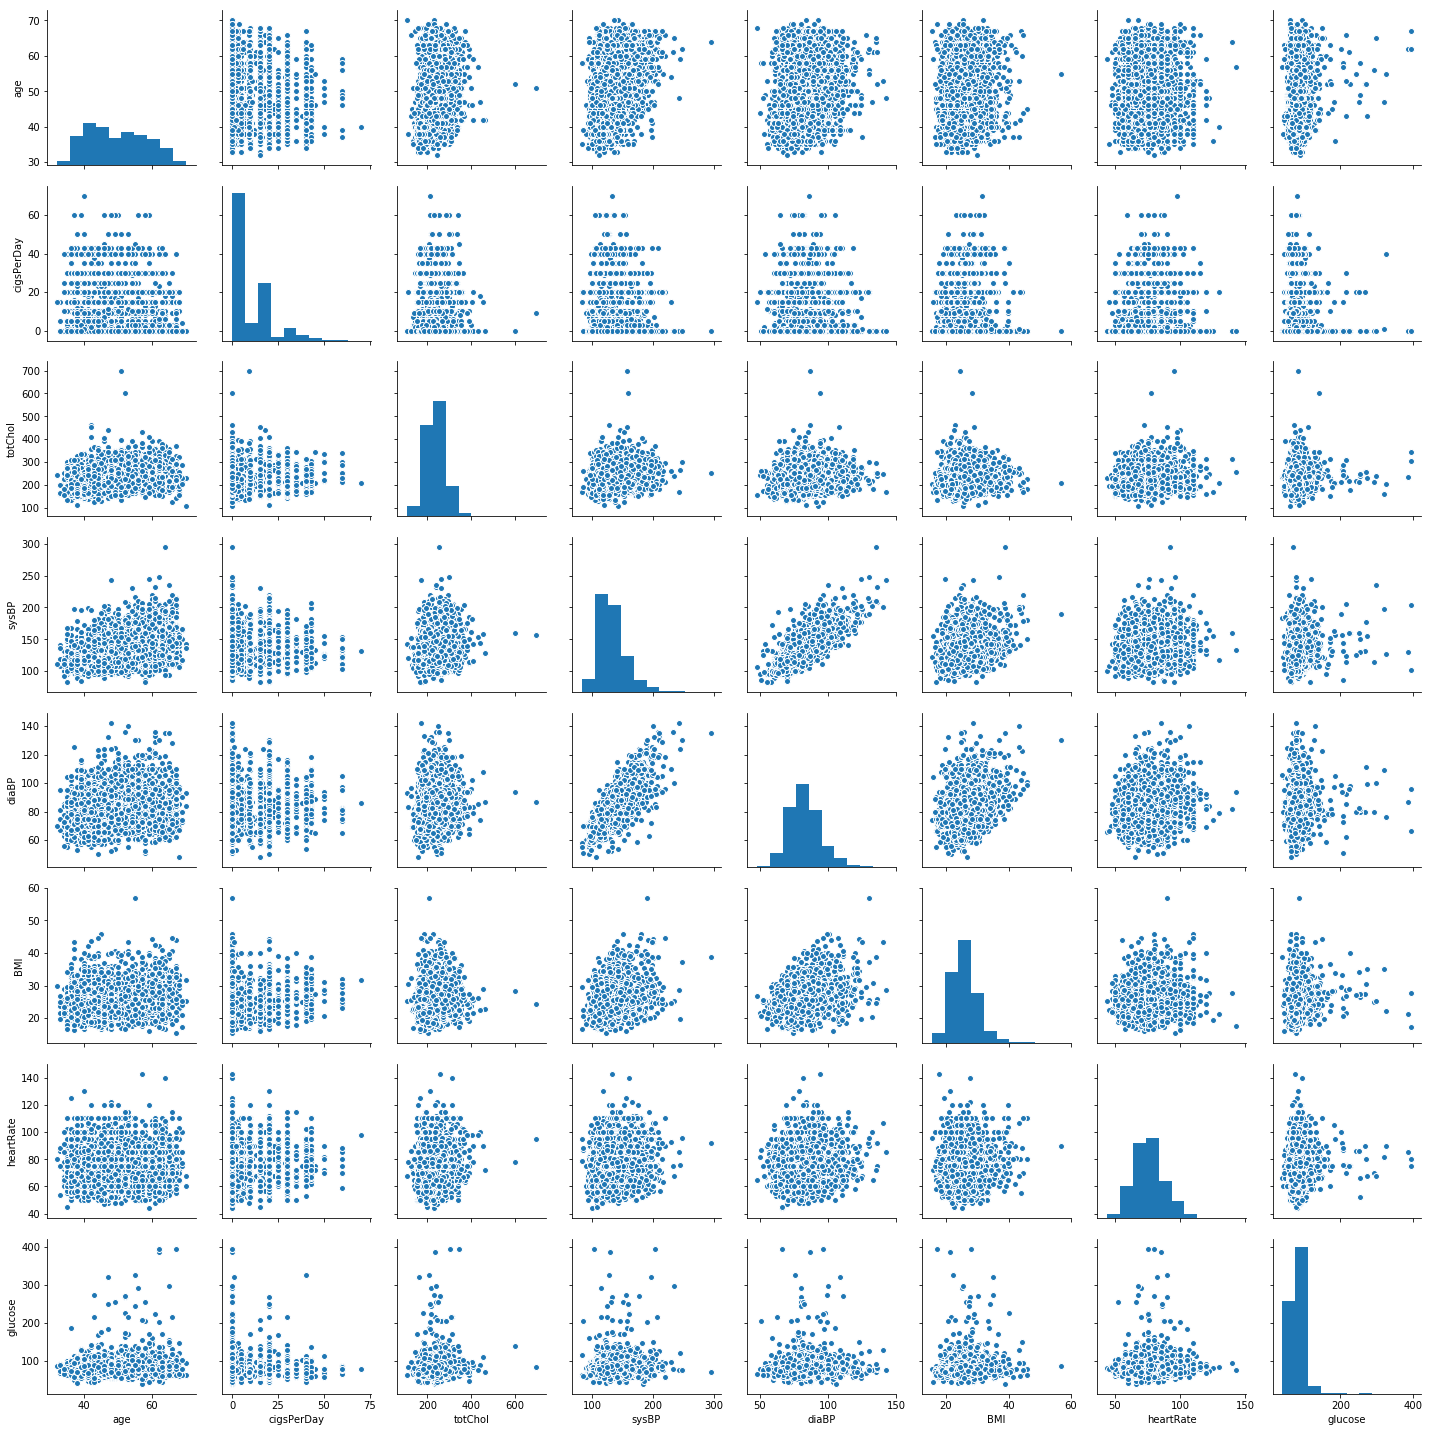

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
continous_feature_names = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] 
# Basic correlogram
sns.pairplot(df_non_na[continous_feature_names])
plt.show()


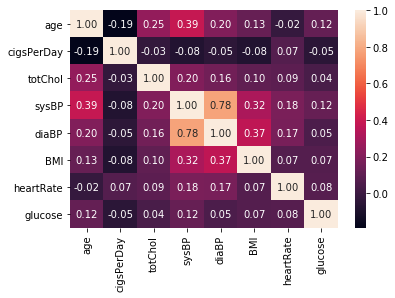

In [12]:
sns.heatmap(df_non_na[continous_feature_names].corr(), annot=True, fmt=".2f")


* There in not very strong correlation between predictor continous variables
* The distribution of variable are skewed will be pre processed in model training

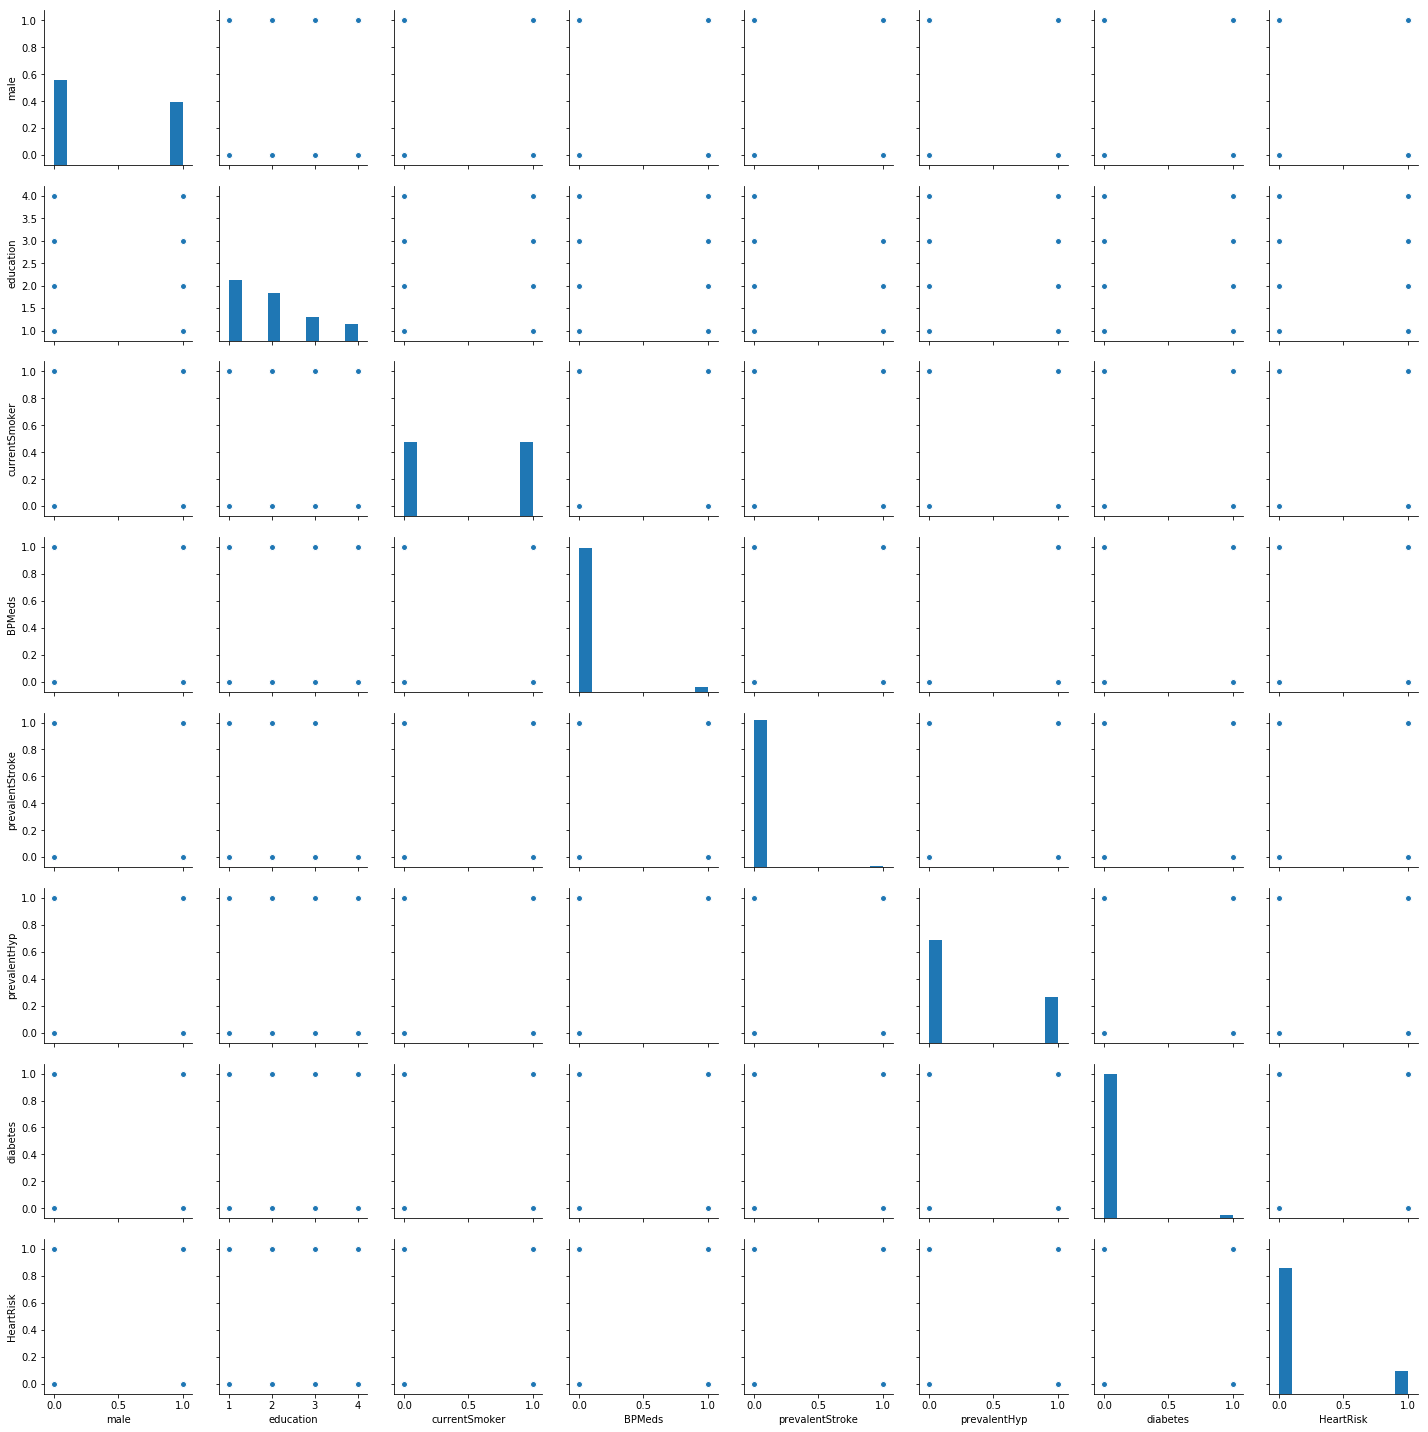

In [13]:
category = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','HeartRisk']
sns.pairplot(df_non_na[category])
plt.show()


* The categorical predictors distribution gives an idea of different variables. 
* The categorical response is imbalanced. Need to use a method that caters imbablanced response variable

Now I will visualize the variation of response variable by taking into account various categorical predictos into account

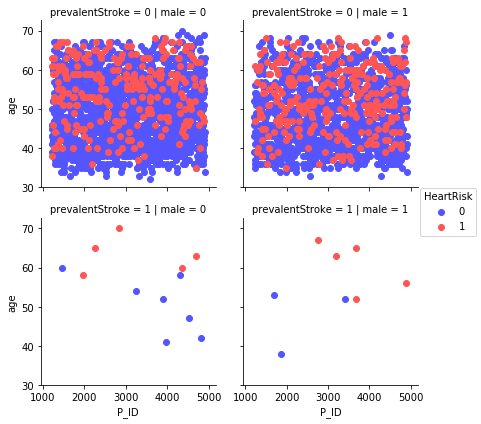

In [15]:
import seaborn as sns
grid = sns.FacetGrid(df_non_na, col = "male", row = "prevalentStroke", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

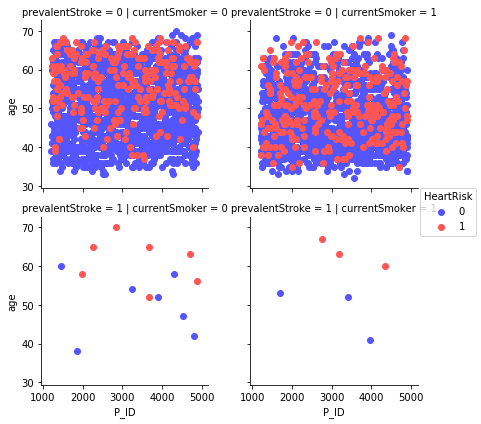

In [16]:
grid = sns.FacetGrid(df_non_na, col = "currentSmoker", row = "prevalentStroke", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

## Insights
* Age can be factor in heart risk in non-male category as it looks that there are more chances of heart risk as age increased in case one is non-male 
* Similarly non smokers have less chance of heart risk at lower age band till 40

let's convert numeric to categorical by binning the continous values to see the interesting impact of those variables on heart risk

In [17]:
continous = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
df_non_na_bin = df_non_na.copy()
for col in continous:
    df_non_na_bin[col] = pd.cut(df_non_na[col], 4,labels=["low", "average", "medium","high"])


In [18]:
df_non_na_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 17 columns):
P_ID               3698 non-null category
male               3698 non-null category
age                3698 non-null int64
education          3698 non-null category
currentSmoker      3698 non-null category
cigsPerDay         3698 non-null category
BPMeds             3698 non-null category
prevalentStroke    3698 non-null category
prevalentHyp       3698 non-null category
diabetes           3698 non-null category
totChol            3698 non-null category
sysBP              3698 non-null category
diaBP              3698 non-null category
BMI                3698 non-null category
heartRate          3698 non-null category
glucose            3698 non-null category
HeartRisk          3698 non-null category
dtypes: category(16), int64(1)
memory usage: 281.4 KB


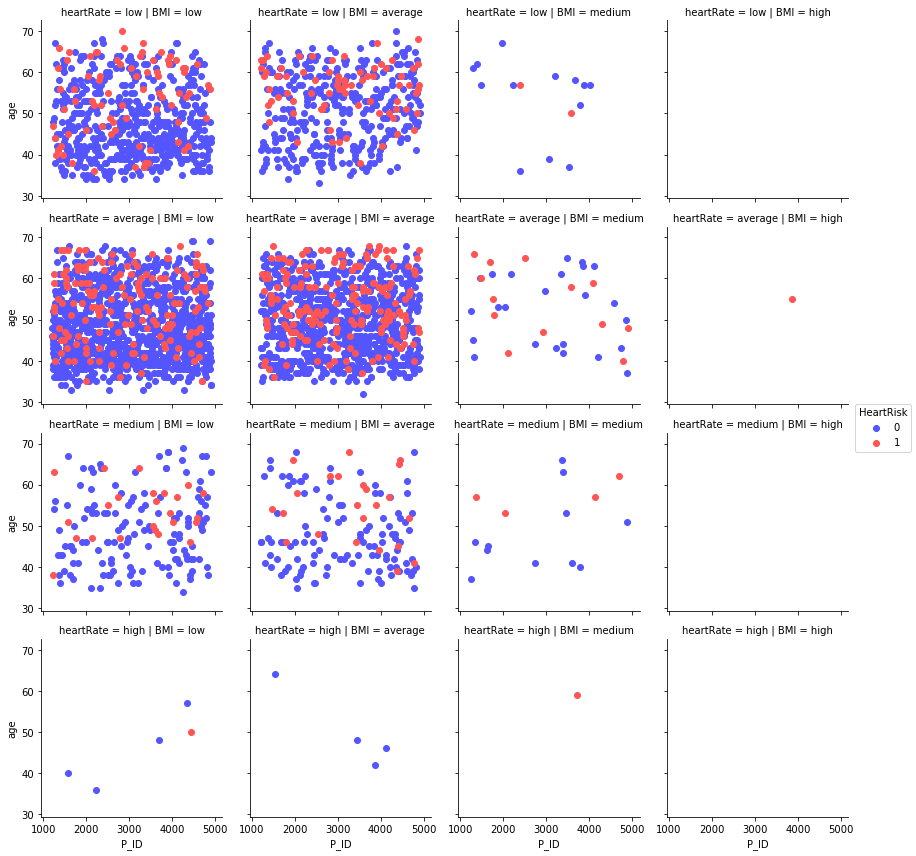

In [20]:
grid = sns.FacetGrid(df_non_na_bin, col = "BMI", row = "heartRate", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

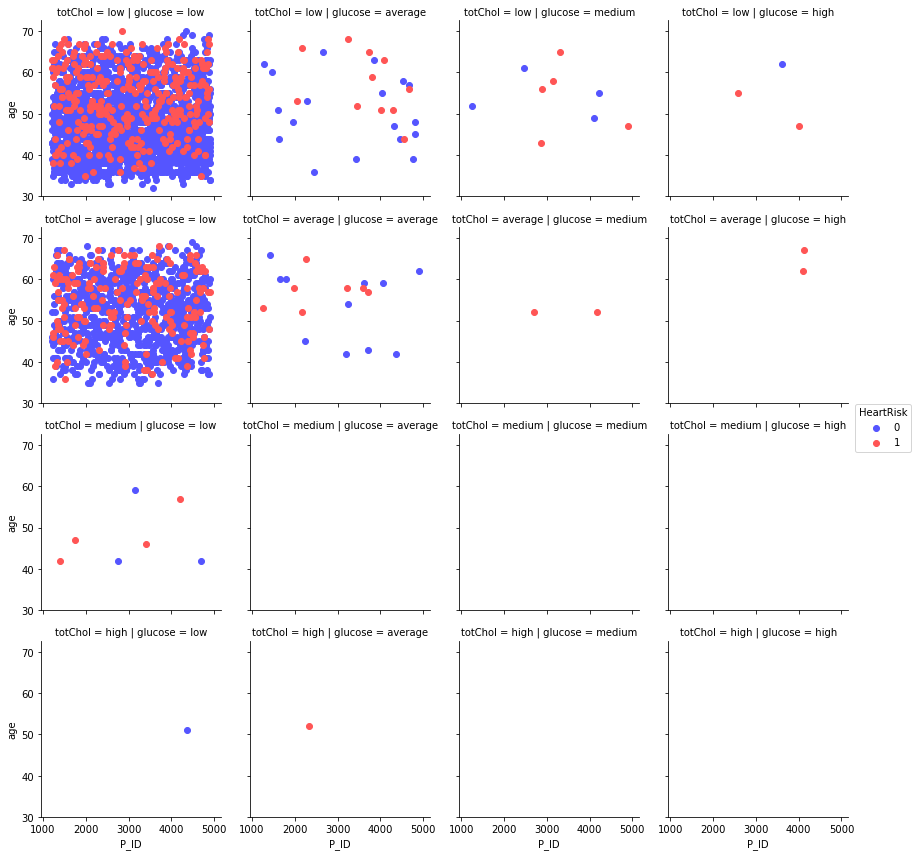

In [21]:
grid = sns.FacetGrid(df_non_na_bin, col = "glucose", row = "totChol", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

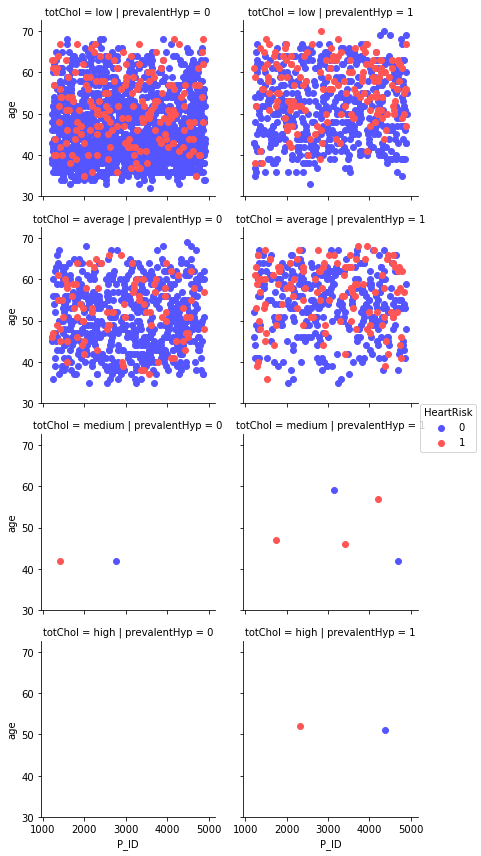

In [22]:
grid = sns.FacetGrid(df_non_na_bin, col = "prevalentHyp", row = "totChol", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

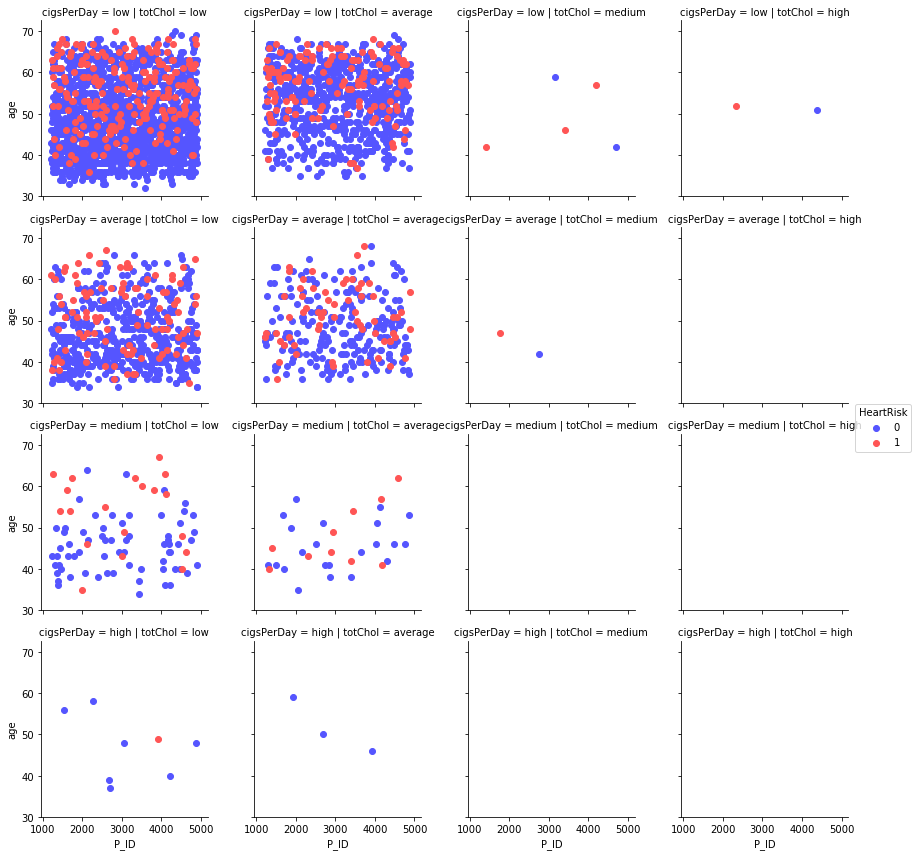

In [23]:
grid = sns.FacetGrid(df_non_na_bin, col = "totChol", row = "cigsPerDay", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

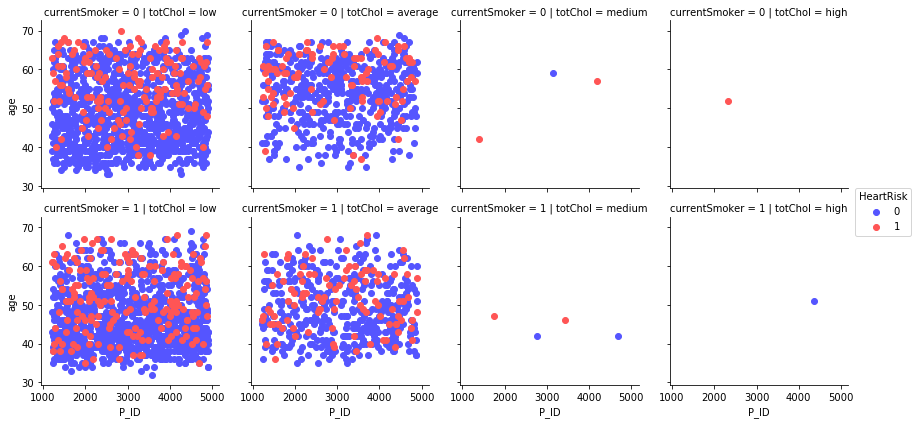

In [24]:
grid = sns.FacetGrid(df_non_na_bin, col = "totChol", row = "currentSmoker", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

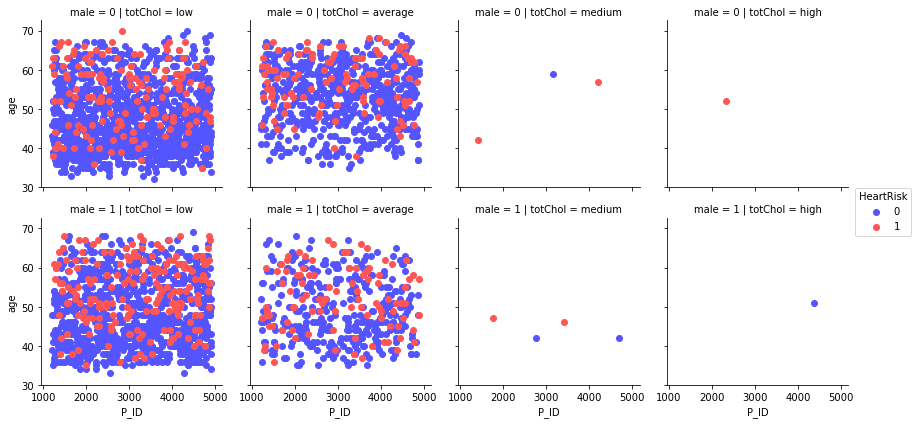

In [25]:
grid = sns.FacetGrid(df_non_na_bin, col = "totChol", row = "male", hue = "HeartRisk", palette = 'seismic')
grid = grid.map(plt.scatter, "P_ID", "age")
grid.add_legend()
grid

Now let's give a shot at what could be the important variables in predicting heart risk. I will be using chisquare test for categorical varibles as predictors and heartrisk as response

In [27]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [28]:
df_non_na_bin.columns

Index(['P_ID', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'HeartRisk'],
      dtype='object')

In [34]:
df_non_na_bin_drop_index = df_non_na_bin.drop(['P_ID','age','HeartRisk'],axis=1)

In [33]:
df_non_na_bin_drop_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 15 columns):
male               3698 non-null category
education          3698 non-null category
currentSmoker      3698 non-null category
cigsPerDay         3698 non-null category
BPMeds             3698 non-null category
prevalentStroke    3698 non-null category
prevalentHyp       3698 non-null category
diabetes           3698 non-null category
totChol            3698 non-null category
sysBP              3698 non-null category
diaBP              3698 non-null category
BMI                3698 non-null category
heartRate          3698 non-null category
glucose            3698 non-null category
HeartRisk          3698 non-null category
dtypes: category(15)
memory usage: 56.4 KB


In [35]:
cT = ChiSquare(df)

#Feature Selection
testColumns = list(df_non_na_bin_drop_index.columns)
#'HeartRisk']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="HeartRisk" )

male is IMPORTANT for Prediction
education is IMPORTANT for Prediction
currentSmoker is NOT an important predictor. (Discard currentSmoker from model)
cigsPerDay is NOT an important predictor. (Discard cigsPerDay from model)
BPMeds is IMPORTANT for Prediction
prevalentStroke is IMPORTANT for Prediction
prevalentHyp is IMPORTANT for Prediction
diabetes is IMPORTANT for Prediction
totChol is IMPORTANT for Prediction
sysBP is IMPORTANT for Prediction
diaBP is IMPORTANT for Prediction
BMI is IMPORTANT for Prediction
heartRate is NOT an important predictor. (Discard heartRate from model)
glucose is IMPORTANT for Prediction


In [4]:
category_cols = ['male','currentSmoker','education','BPMeds','prevalentStroke','prevalentHyp','diabetes']
train_df=pd.get_dummies(df_non_na, columns=category_cols, drop_first=False)
#train_df = df_non_na
#train_df=train_df.drop(['P_ID'],axis=1)
#train_df = train_df.drop(['HeartRisk'],axis =1)
#test_df=pd.get_dummies(test_df, columns=cols, drop_first=True)

In [5]:
y =  df_non_na['HeartRisk']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( train_df, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
"""X_train = df_non_na[['male', 'age', 'education','cigsPerDay','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y_train = df_non_na['HeartRisk']"""

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import numpy as np

clf = RandomForestClassifier(class_weight="balanced",random_state=42) #Initialize with whatever parameters you want to

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:

param_grid = {
                 'n_estimators': [15, 20, 25, 30],
                 'max_depth': [20, 25, 30, 35]
             }
from sklearn.grid_search import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10,verbose=20)
grid_clf.fit(X_train, y_train)

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.841751 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.837838 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.827703 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.851351 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=15, score=0.854730 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.831081 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.833898 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .......... max_depth=20, n_estimators=15, score=0.854237 -   0.1s
[CV] max_depth=20, n_estimators=15 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=15, score=0.861017 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.845118 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.837838 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.9s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=20, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.847973 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=20, score=0.854730 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.834459 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.833898 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.3s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=20, score=0.857627 -   0.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .......... max_depth=20, n_estimators=20, score=0.850847 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.848485 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s remaining:    0.0s


[CV] .......... max_depth=20, n_estimators=25, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.847973 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.844595 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.851351 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.834459 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .......... max_depth=20, n_estimators=25, score=0.837288 -   0.1s
[CV] max_depth=20, n_estimators=25 ...................................
[CV] .

[CV] .......... max_depth=30, n_estimators=15, score=0.841216 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.837838 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.847973 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.844595 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.858108 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.841216 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .......... max_depth=30, n_estimators=15, score=0.830508 -   0.1s
[CV] max_depth=30, n_estimators=15 ...................................
[CV] .

[CV] .......... max_depth=35, n_estimators=25, score=0.837838 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.831081 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.854730 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.841216 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.858108 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.837838 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .......... max_depth=35, n_estimators=25, score=0.840678 -   0.1s
[CV] max_depth=35, n_estimators=25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   14.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 20, 25, 30], 'max_depth': [20, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=20)

In [23]:
grid_clf.best_params_ 
#grid_clf.best_score_ 
#grid_clf.grid_scores_ 
#grid_clf.oob_score_ 

{'max_depth': 20, 'n_estimators': 25}

In [24]:
grid_clf.best_score_

0.845841784989858

In [28]:
clf_best = RandomForestClassifier(class_weight="balanced",random_state=42,max_depth= 20,n_estimators=25)
clf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [29]:
y_pred = clf_best.predict(X_val)

In [30]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.86      0.99      0.92       628
    class 1       0.55      0.10      0.17       112

avg / total       0.81      0.85      0.80       740



In [7]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
train = X_train
target = 'HeartRisk'
IDcol = 'P_ID'
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2958 entries, 383 to 1922
Data columns (total 26 columns):
P_ID                 2958 non-null category
age                  2958 non-null int64
cigsPerDay           2958 non-null float64
totChol              2958 non-null float64
sysBP                2958 non-null float64
diaBP                2958 non-null float64
BMI                  2958 non-null float64
heartRate            2958 non-null float64
glucose              2958 non-null float64
HeartRisk            2958 non-null category
male_0               2958 non-null uint8
male_1               2958 non-null uint8
currentSmoker_0      2958 non-null uint8
currentSmoker_1      2958 non-null uint8
education_1.0        2958 non-null uint8
education_2.0        2958 non-null uint8
education_3.0        2958 non-null uint8
education_4.0        2958 non-null uint8
BPMeds_0.0           2958 non-null uint8
BPMeds_1.0           2958 non-null uint8
prevalentStroke_0    2958 non-null uint8
prevalentS

In [21]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,stratified=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    eval_set = [(X_val[predictors],X_val[target])]
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],early_stopping_rounds=10,
            eval_metric="auc", eval_set=eval_set, verbose=True)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [19]:
param_test1 = {
 'max_depth':[5,10],
 'min_child_weight':[20,25]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=30, scale_pos_weight=5.6, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=30,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Process ForkPoolWorker-131:
Process ForkPoolWorker-125:
Process ForkPoolWorker-132:
Process ForkPoolWorker-123:
Process ForkPoolWorker-128:
Process ForkPoolWorker-126:
Process ForkPoolWorker-130:
Process ForkPoolWorker-129:
Process ForkPoolWorker-127:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/lib/python3.6/multiprocessing/proce

KeyboardInterrupt: 

In [22]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=25,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=5.6,
 seed=27)
modelfit(xgb2, train, predictors)

[0]	validation_0-auc:0.689889
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.730152
[2]	validation_0-auc:0.731126
[3]	validation_0-auc:0.726641
[4]	validation_0-auc:0.73365
[5]	validation_0-auc:0.736323
[6]	validation_0-auc:0.736237

Model Report
Accuracy : 0.7441
AUC Score (Train): 0.818360


/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
y_pred = xgb2.predict(X_val[predictors])

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_val, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.91      0.73      0.81       628
    class 1       0.29      0.61      0.39       112

avg / total       0.82      0.71      0.75       740



In [33]:
xls = ExcelFile('Dataset-2 (3).xlsx')
df_test = xls.parse(xls.sheet_names[0])

In [34]:
category = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','HeartRisk']
for col in category:
    df_test[col] = df_test[col].astype('category')

In [35]:
test_df = df_test
test_df = test_df.drop(['P_ID'],axis=1)
test_df = test_df.drop(['HeartRisk'],axis=1)

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 15 columns):
male               541 non-null category
age                541 non-null int64
education          530 non-null category
currentSmoker      541 non-null category
cigsPerDay         537 non-null float64
BPMeds             534 non-null category
prevalentStroke    541 non-null category
prevalentHyp       541 non-null category
diabetes           541 non-null category
totChol            537 non-null float64
sysBP              541 non-null float64
diaBP              541 non-null float64
BMI                541 non-null float64
heartRate          541 non-null int64
glucose            498 non-null float64
dtypes: category(7), float64(6), int64(2)
memory usage: 38.3 KB


In [37]:
columns_with_null = test_df.columns[test_df.isnull().any()].tolist()

In [38]:
columns_with_null

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'glucose']

In [39]:
testdf = test_df.fillna(test_df.median(),inplace=True)

In [40]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 15 columns):
male               541 non-null category
age                541 non-null int64
education          541 non-null category
currentSmoker      541 non-null category
cigsPerDay         541 non-null float64
BPMeds             541 non-null category
prevalentStroke    541 non-null category
prevalentHyp       541 non-null category
diabetes           541 non-null category
totChol            541 non-null float64
sysBP              541 non-null float64
diaBP              541 non-null float64
BMI                541 non-null float64
heartRate          541 non-null int64
glucose            541 non-null float64
dtypes: category(7), float64(6), int64(2)
memory usage: 38.3 KB


In [41]:
testdf =pd.get_dummies(testdf, columns=category_cols, drop_first=False)

In [42]:
y_pred_test = xgb2.predict(testdf)

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
sub_df = pd.concat([df_test['P_ID'],pd.Series(y_pred_test,name = 'HeartRisk')], axis=1)

In [51]:
sub_df.to_csv('out.csv', encoding='utf-8')